In [126]:
from pymatgen import MPRester
from pymatgen.electronic_structure import bandstructure
from pymatgen.electronic_structure.plotter import BSPlotter

import matplotlib.pyplot as plt
import numpy as np

In [127]:
with MPRester("qqtqIIM2PLMiknnf9nQO") as m: #Mettre ("USER_API_KEY")

    mp = "mp-15687"
    
    # Structure for material id
    structure = m.get_bandstructure_by_material_id(mp)
    
#print (structure)

In [128]:
#Variables utiles
plot = plotter.BSPlotter(structure)
data = plot.bs_plot_data()
ener = data.get('energy')['1']  

In [129]:
#Caractéristiques de la bande interdite
band_gap = structure.get_band_gap()
print("La bande interdite est directe :",band_gap['direct'], " -> La bande interdite est donc indirecte")
print("La largeur du gap est de (énergie):",band_gap['energy'],"eV")
print("Le vecteur d'onde se déplace alors dans la direction (Transition):",band_gap['transition'])

La bande interdite est directe : False  -> La bande interdite est donc indirecte
La largeur du gap est de (énergie): 0.19910000000000005 eV
Le vecteur d'onde se déplace alors dans la direction (Transition): A-\Gamma


Représentation 3D de la première zone de Brillouin du KZnAs.


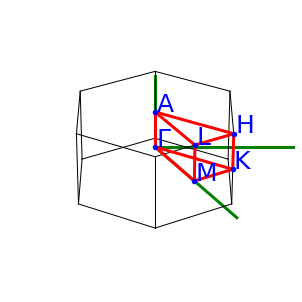

In [130]:
print("Représentation 3D de la première zone de Brillouin du KZnAs.")
BSPlott = BSPlotter(structure)
BSPlott.plot_brillouin()

In [131]:
#Caractéristiques de la dernière bande de valence
valence_band = structure.get_vbm()
print("Caractéristiques du maximum de la dernière bande de valence :\n\nEnergie : {} eV\nEnergie - Energie_Fermi : {} eV\n".format(valence_band["energy"], valence_band["energy"]-data["zero_energy"]))

Caractéristiques du maximum de la dernière bande de valence :

Energie : 1.4804 eV
Energie - Energie_Fermi : 0.0 eV



In [132]:
#Caractéristiques de la première bande de conduction
conduction_band = structure.get_cbm()
print("Caractéristiques du maximum de la dernière bande de valence :\n\nEnergie : {} eV\nEnergie - Energie_Fermi : {} eV\n".format(conduction_band["energy"], conduction_band["energy"]-data["zero_energy"]))

Caractéristiques du maximum de la dernière bande de valence :

Energie : 1.6795 eV
Energie - Energie_Fermi : 0.19910000000000005 eV



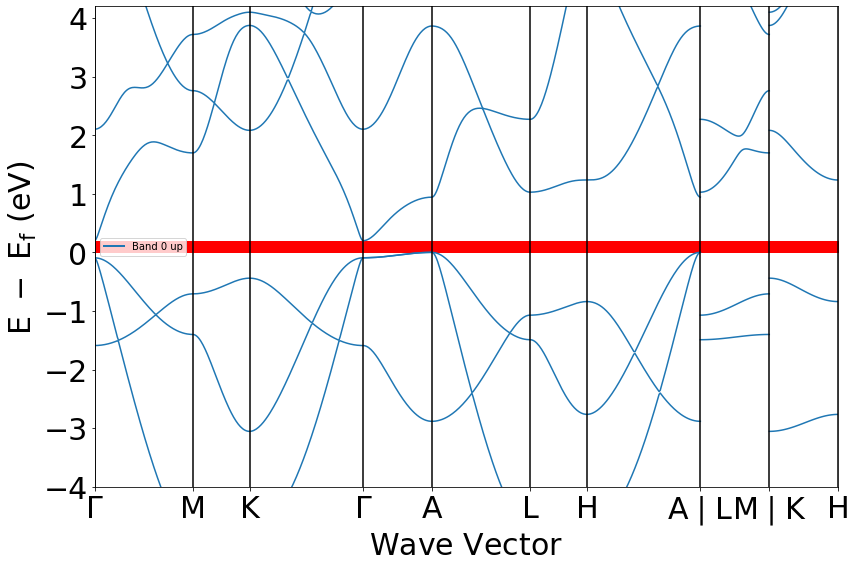

In [133]:
#Représentation de la bande interdite
paths = data["distances"]
full_path = np.linspace(paths[0][0],paths[-1][-1],500)

plot.get_plot()
plt.fill_between(full_path,0,band_gap.get('energy'),color="red")

<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

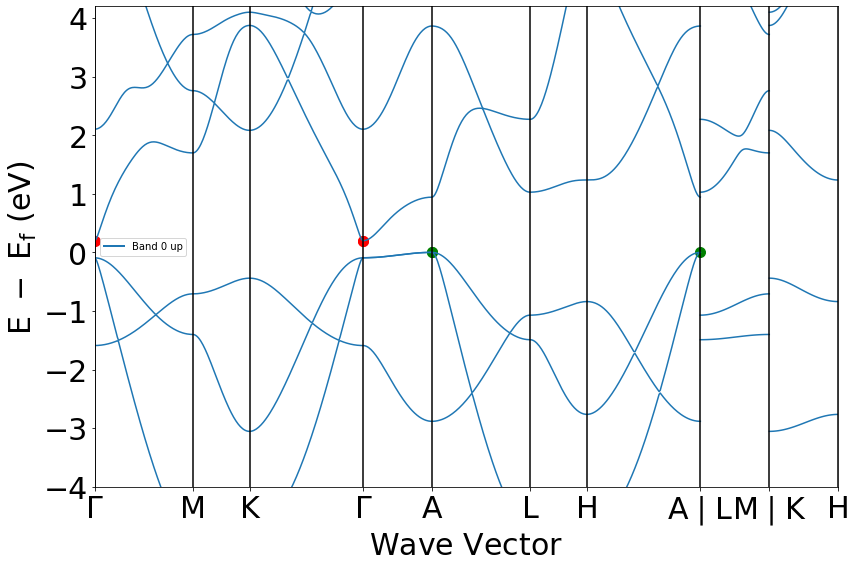

In [134]:
#Montre le max de la dernière bande de valence et le minimum de la première bande de conduction
bandplot = BSPlotter(structure)
bandplot.get_plot(vbm_cbm_marker=True)

In [135]:
#Trouver bande avec plus haute énergie (BV) et plus basse énergie(BC)
data = bandplot.bs_plot_data()
ticks = data.get("ticks")
distance = ticks['distance']

#energie des bandes
energie = data['energy']
print('\n',structure.get_vbm()['band_index'])
print("Le maximum de la bande de valence se trouve dans les bandes 12 et 13.")
print('\n',structure.get_cbm()['band_index'])
print("Le minimum de la bande de conduction est contenu dans la bande 14.")
print("\nLa dernière bande de valence est donc la bande d'indice 12, donc la bande 13 et la première bande de conduction est la bande d'indice 13, donc la bande 14.")


 defaultdict(<class 'list'>, {<Spin.up: 1>: [11, 12]})
Le maximum de la bande de valence se trouve dans les bandes 12 et 13.

 defaultdict(<class 'list'>, {<Spin.up: 1>: [13]})
Le minimum de la bande de conduction est contenu dans la bande 14.

La dernière bande de valence est donc la bande d'indice 12, donc la bande 13 et la première bande de conduction est la bande d'indice 13, donc la bande 14.


In [136]:
#Dispersions pour la dernière bande de valence 

#Difference d'energie entre chaque branche pour la derniere bande de valence 
v0 = energie.get('1')[0][12]
venergie0 = v0[0]-v0[-1]

v1 = energie.get('1')[1][12]
venergie1 = v1[0]-v1[-1]

v2 = energie.get('1')[2][12]
venergie2 = v2[0]-v2[-1]

v3 = energie.get('1')[3][12]
venergie3 = v3[0]-v3[-1]

v4 = energie.get('1')[4][12]
venergie4 = v4[0]-v4[-1]

v5 = energie.get('1')[5][12]
venergie5 = v5[0]-v5[-1]

v6 = energie.get('1')[6][12]
venergie6 = v6[0]-v6[-1]

v7 = energie.get('1')[7][12]
venergie7 = v7[0]-v7[-1]

v8 = energie.get('1')[8][12]
venergie8 = v8[0]-v8[-1]

print("difference d'energie entre Γ-M: ", venergie0)
print("difference d'energie entre M-K: ", venergie1)
print("difference d'energie entre K-Γ: ", venergie2)
print("difference d'energie entre Γ-A: ", venergie3)
print("difference d'energie entre A-L: ", venergie4)
print("difference d'energie entre L-H: ", venergie5)
print("difference d'energie entre H-A|L: ", venergie6)
print("difference d'energie entre A|L-M|K: ", venergie7)
print("difference d'energie entre M|K-H: ", venergie8)

#distance entre chaque branche d'energie

dist0 = distance[1]-distance[0]
dist1 = distance[3]-distance[1]
dist2 = distance[5]-distance[3]
dist3 = distance[7]-distance[5]
dist4 = distance[9]-distance[7]
dist5 = distance[11]-distance[9]
dist6 = distance[13]-distance[11]
dist7 = distance[14]-distance[13]
dist8 = distance[15]-distance[14]

#pente entre chaque branche pour la derniere bande de valence

vpente0 = venergie0/dist0
vpente1 = venergie1/dist1
vpente2 = venergie2/dist2
vpente3 = venergie3/dist3
vpente4 = venergie4/dist4
vpente5 = venergie5/dist5
vpente6 = venergie6/dist6
vpente7 = venergie7/dist7
vpente8 = venergie8/dist8

pentes = np.array([vpente0, vpente1, vpente2, vpente3, vpente4, vpente5, vpente6, vpente7, vpente8])
print(pentes )

pente_abs = [abs(vpente0), abs(vpente1),abs(vpente2),abs(vpente3),abs(vpente4),abs(vpente5),abs(vpente6),abs(vpente7),abs(vpente8)]

#Calcul de la plus grande pente et de la plus petite
energies = data["energy"]

Max = 0
Min = 99
chemin_max = 0
chemin_min = 0

for i in range(len(paths)) :
    diff = abs(energies["1"][i][12][0] - energies["1"][i][12][-1]) #energies["1"][numéro du chemin][numéro de la bande][indice dans la liste]
    diff /= (paths[i][-1] - paths[i][0])
    if Max < diff :
        Max = diff
        chemin_max = i
    if Min > diff :
        Min = diff
        chemin_min = i


print('La dispersion maximale pour la dernière bande de valence a lieu dans le chemin {} : A-L :'.format(chemin_max+1), max(pente_abs) )
print('La dispersion minimale pour la dernière bande de valence a lieu dans le chemin {} : Γ-A :'.format(chemin_min+1), min(pente_abs) )

difference d'energie entre Γ-M:  0.6154
difference d'energie entre M-K:  -0.268
difference d'energie entre K-Γ:  -0.34739999999999993
difference d'energie entre Γ-A:  -0.09319999999999995
difference d'energie entre A-L:  1.0716999999999999
difference d'energie entre L-H:  -0.23159999999999992
difference d'energie entre H-A|L:  -0.8401
difference d'energie entre A|L-M|K:  -0.3631
difference d'energie entre M|K-H:  0.3995000000000001
[ 0.72287977 -0.5452604  -0.35340204 -0.15603166  1.25887268 -0.47120264
 -0.85461443 -0.60788729  0.6688267 ]
La dispersion maximale pour la dernière bande de valence a lieu dans le chemin 5 : A-L : 1.2588726767644878
La dispersion minimale pour la dernière bande de valence a lieu dans le chemin 4 : Γ-A : 0.15603165987795248


In [137]:
#Dispersions pour la premiere bande de conduction

#Difference d'energie entre chaque branche pour la première bande de condiction
c0 = energie.get('1')[0][13]
cenergie0 = c0[0]-c0[-1]

c1 = energie.get('1')[1][13]
cenergie1 = c1[0]-c1[-1]

c2 = energie.get('1')[2][13]
cenergie2 = c2[0]-c2[-1]

c3 = energie.get('1')[3][13]
cenergie3 = c3[0]-c3[-1]

c4 = energie.get('1')[4][13]
cenergie4 = c4[0]-c4[-1]

c5 = energie.get('1')[5][13]
cenergie5 = c5[0]-c5[-1]

c6 = energie.get('1')[6][13]
cenergie6 = c6[0]-c6[-1]

c7 = energie.get('1')[7][13]
cenergie7 = c7[0]-c7[-1]

c8 = energie.get('1')[8][13]
cenergie8 = c8[0]-c8[-1]

print("difference d'energie entre Γ-M: ", cenergie0)
print("difference d'energie entre M-K: ", cenergie1)
print("difference d'energie entre K-Γ: ", cenergie2)
print("difference d'energie entre Γ-A: ", cenergie3)
print("difference d'energie entre A-L: ", cenergie4)
print("difference d'energie entre L-H: ", cenergie5)
print("difference d'energie entre H-A|L: ", cenergie6)
print("difference d'energie entre A|L-M|K: ", cenergie7)
print("difference d'energie entre M|K-H: ", cenergie8)

#pente entre chaque branche pour la derniere bande de valence

cpente0 = cenergie0/dist0
cpente1 = cenergie1/dist1
cpente2 = cenergie2/dist2
cpente3 = cenergie3/dist3
cpente4 = cenergie4/dist4
cpente5 = cenergie5/dist5
cpente6 = cenergie6/dist6
cpente7 = cenergie7/dist7
cpente8 = cenergie8/dist8

pentes = np.array([cpente0, cpente1, cpente2, cpente3, cpente4, cpente5, cpente6, cpente7, cpente8])
print(pentes )

pente_abs = [abs(cpente0), abs(cpente1),abs(cpente2),abs(cpente3),abs(cpente4),abs(cpente5),abs(cpente6),abs(cpente7),abs(cpente8)]

#Calcul de la plus grande pente et de la plus petite
energies = data["energy"]

Max = 0
Min = 99
chemin_max = 0
chemin_min = 0
for i in range(len(paths)) :
    diff = abs(energies["1"][i][13][0] - energies["1"][i][13][-1]) #energies["1"][numéro du chemin][numéro de la bande][indice dans la liste]
    diff /= (paths[i][-1] - paths[i][0])
    if Max < diff :
        Max = diff
        chemin_max = i
    if Min > diff :
        Min = diff
        chemin_min = i
        
print('La dispersion maximale pour la première bande de conduction a lieu dans le chemin {} : K-Γ:'.format(chemin_max+1),  max(pente_abs) )
print('La dispersion minimale pour la première bande de conduction a lieu dans le chemin {} : A-L:'.format(chemin_min+1),  min(pente_abs) )

difference d'energie entre Γ-M:  -1.4983
difference d'energie entre M-K:  -0.38500000000000023
difference d'energie entre K-Γ:  1.8833000000000002
difference d'energie entre Γ-A:  -0.7429999999999999
difference d'energie entre A-L:  -0.08510000000000018
difference d'energie entre L-H:  -0.2077
difference d'energie entre H-A|L:  0.29280000000000017
difference d'energie entre A|L-M|K:  -0.6701999999999999
difference d'energie entre M|K-H:  0.8475000000000001
[-1.75997847 -0.78330318  1.91583782 -1.24390046 -0.09996274 -0.42257681
  0.29785871 -1.12202166  1.41885013]
La dispersion maximale pour la première bande de conduction a lieu dans le chemin 3 : K-Γ: 1.915837823312448
La dispersion minimale pour la première bande de conduction a lieu dans le chemin 5 : A-L: 0.09996273657988071


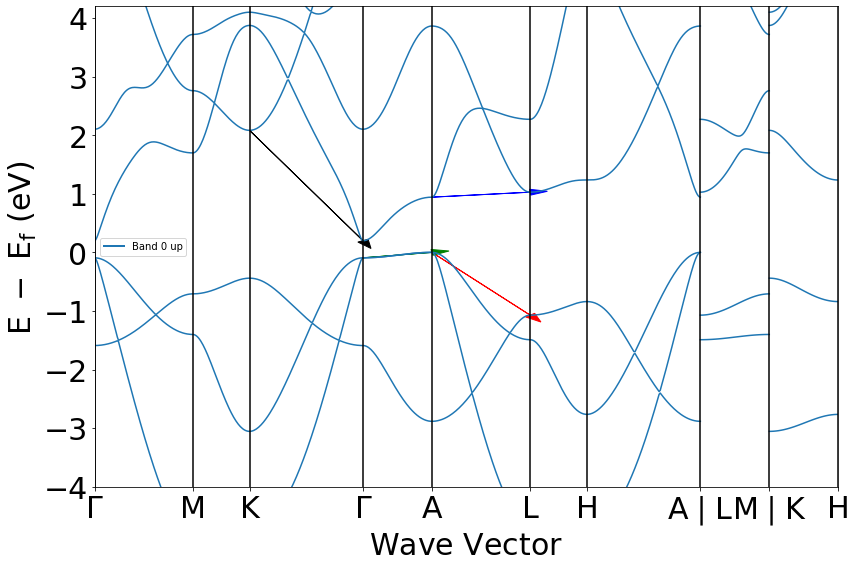

In [138]:
#Représentation des dispersions
bandplot.get_plot()

# Flèche représentant la direction pour laquelle la bande de valence présente le plus de dispersion 
Flechemaxval = plt.arrow(distance[7], energie.get('1')[4][12][0], dist4, -venergie4, color = 'r', head_width = 0.1)

# Flèche représentant la direction pour laquelle la bande de valence présente le moins de dispersion 
Flecheminval = plt.arrow(distance[5], energie.get('1')[3][12][0], dist3, -venergie3, color = 'g', head_width = 0.1)

# Flèche représentant la direction pour laquelle la bande de conduction présente le moins de dispersion
Flechemincon = plt.arrow(distance[7], energie.get('1')[4][13][0], dist4, -cenergie4, color = 'b', head_width = 0.1)

# Flèche représentant la direction pour laquelle la bande de conduction présente le plus de dispersion 
Flechemaxcon = plt.arrow(distance[4], energie.get('1')[2][13][0], dist2, -cenergie2, color = 'k', head_width = 0.1)

Le tenseur des masses effectives étant symétrique, on peut le réduire à 3 composantes indépendantes sur la diagonale. En supposant une dispersion parabolique, la masse effective est isotrope et donc le tenseur des masses effectives peut finalement se réduire à un scalaire.
On peut calculer la masse effective grâce à la formule suivante: $m^* = \hbar ^2 \left( \frac{\partial ^2 E}{\partial k^2} \right) ^{-1}$

Avec $\hbar$, la constante de Planck

$\epsilon$, l'énergie 

k, le vecteur d'onde.

On suppose une dispersion parabolique. On peut calculer la dérivée seconde d'une parabole : $ ax^2+bx+c$. La dérivée donne donc 2a.
En utilisant l'hypothèse de dispersion parabolique, nous pouvons approximer l'équation par :$$
E(k)-E_0 = \frac{\hbar^2}{2m^*}k^2 \Rightarrow m^* = \frac{\hbar^2 k^2}{2E}
$$

Bande de valence: Coefficient abc de la parabole d'équation ax2 + bx + c: [ -4.90446537  28.30199341 -40.81288333]
Bande de conduction: Coefficient abc de la parabole d'équation ax2 + bx + c: [  22.28919852 -105.73189825  125.59208755]

Masse effective au sommet de la dernière bande de valence: -7.076528823860931e-31 kg (masse effective négative due à la courbure vers le bas)
Masse effective à la base de la première bande de conduction: 1.5571035681832017e-31 kg

Les approximations quadratiques sont représentées en rouge


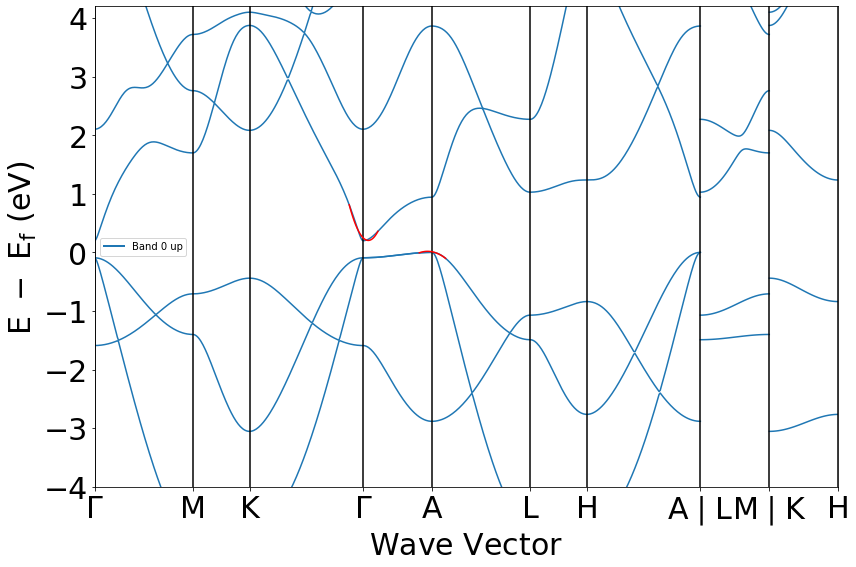

In [139]:
# Conversion d'unité
#Pour avoir une masse en kg, il faut diviser par un eV et le carré d'un $Å$. 
#Pour une masse en masse d'électron, il faut diviser par la masse de l'électron dans le vide.
Ang = 10**-10 
eV = 1.602176563*10**(-19) 
hbar = 1.054571818*10**(-34)

## Bande de valence

bvx = [dist[3][-12], dist[4][4],dist[4][12]]
bvy = [ener[3][12][-12], ener[4][12][4], ener[4][12][12]]

# Système de 3 équations à 3 inconnues pour les coefficients a, b et c de la parabole
A = [[bvx[0]**2, bvx[0], 1], [bvx[1]**2, bvx[1], 1], [bvx[2]**2, bvx[2], 1]]
B = np.transpose(bvy)
abc_bv = np.linalg.solve(A,B)
masse_bv = (hbar**2)/(2*abc_bv[0]*Ang**2*eV)

## Bande de conduction

bcx = [dist[2][-13], dist[3][3],dist[3][13]]
bcy = [ener[2][13][-13], ener[3][13][3], ener[3][13][13]]

#Système de 3 équations à 3 inconnues pour les coefficients a, b et c de la parabole
A = [[bcx[0]**2, bcx[0], 1], [bcx[1]**2, bcx[1], 1], [bcx[2]**2, bcx[2], 1]]
B = np.transpose(bcy)
abc_bc = np.linalg.solve(A,B)
masse_bc = (hbar**2)/(2*abc_bc[0]*Ang**2*eV)

coeff = [abc_bv, abc_bc]
masse_eff = [masse_bv, masse_bc]

print("Bande de valence: Coefficient abc de la parabole d'équation ax2 + bx + c:",coeff[0])
print("Bande de conduction: Coefficient abc de la parabole d'équation ax2 + bx + c:",coeff[1])
print("\nMasse effective au sommet de la dernière bande de valence:", masse_eff[0],"kg","(masse effective négative due à la courbure vers le bas)")
print("Masse effective à la base de la première bande de conduction:", masse_eff[1],"kg")

#Représentation
BsPlotter.get_plot()

para_val = np.polyfit(bvx,bvy,2)
linspace_val = np.linspace(dist[3][-12],dist[4][12],100) 
plt.plot(linspace_val, np.polyval(para_val,linspace_val), 'red')

para_cond = np.polyfit(bcx,bcy,2)
linspace_cond = np.linspace(dist[2][-13],dist[3][13],100) 
plt.plot(linspace_cond, np.polyval(para_cond,linspace_cond), 'red')
print("\nLes approximations quadratiques sont représentées en rouge")